In [7]:
import ltspice
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import csv

In [17]:
path = 'Draft1.raw'
l = ltspice.Ltspice(path)
l.parse()

In [18]:
time = l.get_time()

Id = l.get_data('Id(M1)')
Vgs = l.get_data('V(n002)')

sqrt_id = np.sqrt(Id)

In [19]:
cut_id = []
cut_volt = []
# between 0.36 and 0.5 for Vds = 1.5V => Vt0 = 0.2546
# between 0.4 and 0.6 for Vds = 0.6V (more accurate due to DIBL effct) => 0.3135
for idx, volt in enumerate(Vgs):
    if volt > 0.4 and volt < 0.6:
        cut_id.append(sqrt_id[idx])
        cut_volt.append(Vgs[idx])

slope, intercept = np.polyfit(cut_volt, cut_id, 1)
print(slope, intercept)
print('Vt: ', (-intercept)/slope)

0.03421521168820235 -0.010726470875238016
Vt:  0.313500058774635


In [11]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

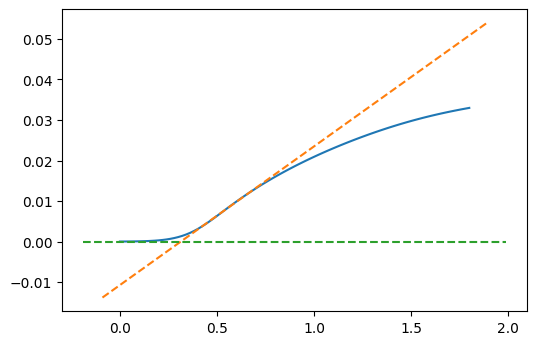

In [12]:
matplotlib.rcParams["figure.dpi"] = 100
plt.plot(Vgs, sqrt_id)
abline(slope, intercept)
abline(0, 0)
plt.savefig('graph_threshold_voltage.svg')
plt.show()